In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
#DATA PREPROCESSING

wine= pd.read_csv('C:\/Users\Acer\Desktop\ML\DATA\wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df= wine.drop('Type', axis=1)

#(droping the Type thought not so useful)

In [11]:
df[df.duplicated()]

#(no duplicaye values)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [13]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


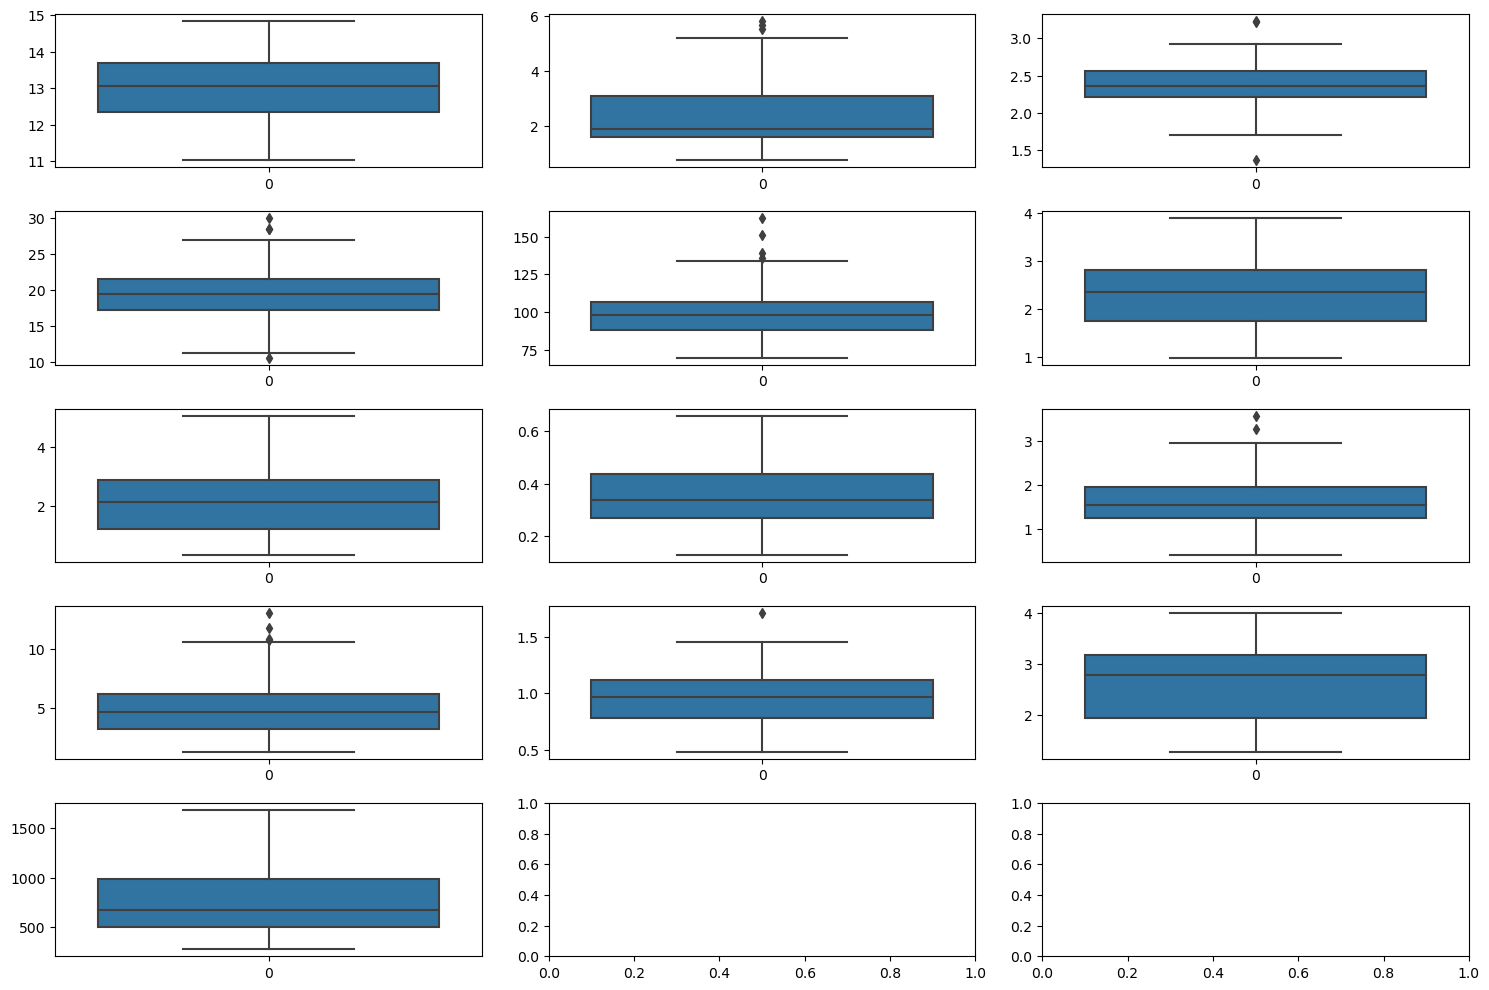

In [28]:
fig, ax = plt.subplots(5, 3, figsize=(15,10))
sns.boxplot(df.Alcohol,ax=ax[0,0])
sns.boxplot(df.Malic,ax=ax[0,1])
sns.boxplot(df.Ash,ax=ax[0,2])
sns.boxplot(df.Alcalinity,ax=ax[1,0])
sns.boxplot(df.Magnesium,ax=ax[1,1])
sns.boxplot(df.Phenols,ax=ax[1,2])
sns.boxplot(df.Flavanoids,ax=ax[2,0])
sns.boxplot(df.Nonflavanoids,ax=ax[2,1])
sns.boxplot(df.Proanthocyanins,ax=ax[2,2])
sns.boxplot(df.Color,ax=ax[3,0])
sns.boxplot(df.Hue,ax=ax[3,1])
sns.boxplot(df.Dilution,ax=ax[3,2])
sns.boxplot(df.Proline, ax=ax[4,0])
plt.tight_layout()

#(checking the outliers)

In [115]:
df_norm= scale(df)
df_norm

#(normalizing the data)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.10315973],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.10315973],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.10315973],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.35137067],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.35137067],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.35137067]])

Text(0.5, 1.0, 'dendrogram')

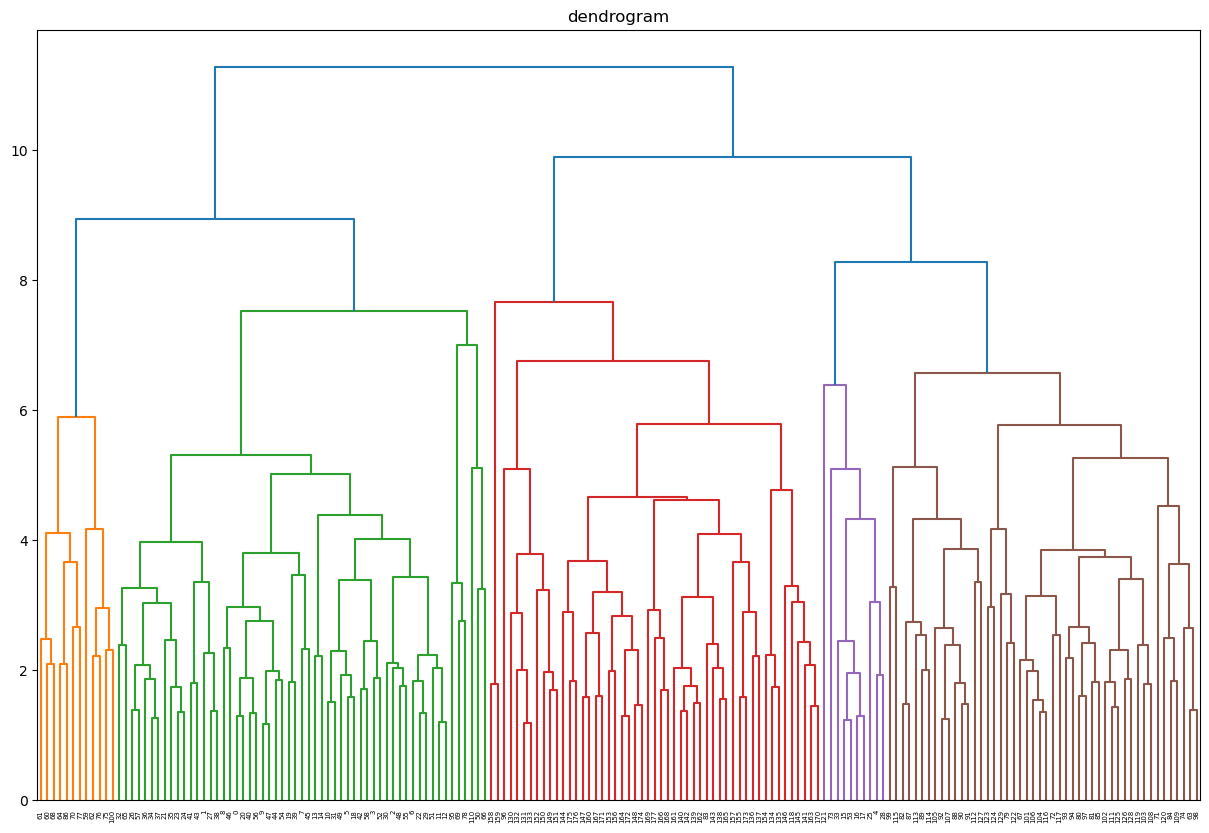

In [116]:
#HIRARCHICAL CLUSTERING FOR ORIGINAL DATA

plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('dendrogram')

#(dendrogram of complete normalized original dataset)

In [117]:
hc1= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hc1

#(taking 5 clusters with complete linkage)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [118]:
y_hc1=hc1.fit_predict(df_norm)
y_hc1
cluster=pd.DataFrame(y_hc1,columns=['hc1_cluster'])
cluster

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,hc1_cluster
0,1
1,1
2,1
3,1
4,4
...,...
173,0
174,0
175,0
176,0


In [119]:
wine['hc1_cluster']= y_hc1

In [120]:
wine.groupby('hc1_cluster').agg(['mean']).reset_index()

,hc1_cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,hc2_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196,2.0,1.000000
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632,0.0,1.859649
2,2,2.000000,12.210000,2.008750,2.291250,20.981250,88.375000,2.317292,2.175417,0.363542,1.662917,2.848125,1.038333,2.958333,479.083333,1.0,0.041667
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000,0.0,0.416667
4,4,1.200000,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000,1.0,2.000000


In [122]:
for i in range(5):
    print('cluster:', i)
    print('total no.:', len(list(wine[wine['hc1_cluster']==i]['Type'].values)))
    print()

cluster: 0
total no.: 51

cluster: 1
total no.: 57

cluster: 2
total no.: 48

cluster: 3
total no.: 12

cluster: 4
total no.: 10



Text(0.5, 1.0, 'dendrogram')

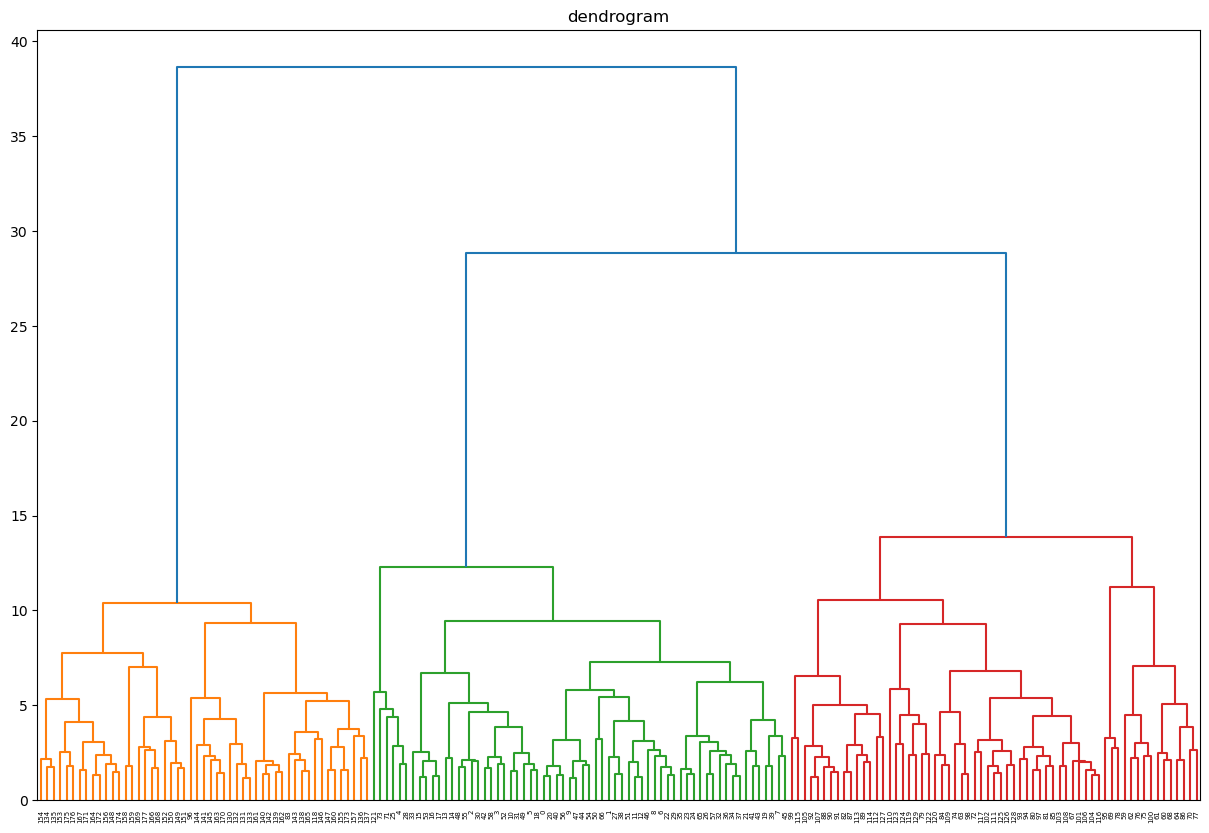

In [123]:
plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.title('dendrogram')

#(dendogram of ward method )
'''(Wardmethod is used to calculate the distance b/w clusters it will effective when the clusters are in different size 
    and shape. Mainly its aims to reduse the variance within the clusters.)'''

In [130]:
hc2= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc2

#(using 3 clusters to minimize the no. of clusters)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [131]:
y_hc2= hc2.fit_predict(df_norm)
y_hc2
cluster= pd.DataFrame(y_hc2, columns=['hc2_Cluster'])
cluster

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,hc2_Cluster
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [132]:
wine['hc2_cluster']= y_hc2

In [133]:
wine.groupby('hc2_cluster').agg(['mean']).reset_index()

,hc2_cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,hc1_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.226508,1.910476,2.215556,20.004762,93.555556,2.232857,2.019841,0.366984,1.613968,2.949524,1.057079,2.786349,513.222222,0.746032,2.126984
1,1,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196,2.000000,0.000000
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,0.171875,1.484375


In [134]:
for i in range(3):
    print('cluster:', i)
    print('total no.:', len(list(wine[wine['hc2_cluster']==i]['Type'].values)))
    print()

cluster: 0
total no.: 63

cluster: 1
total no.: 51

cluster: 2
total no.: 64



In [138]:
#KMEANS CLUSTERING FOR ORIGINAL DATA

wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'wcss')

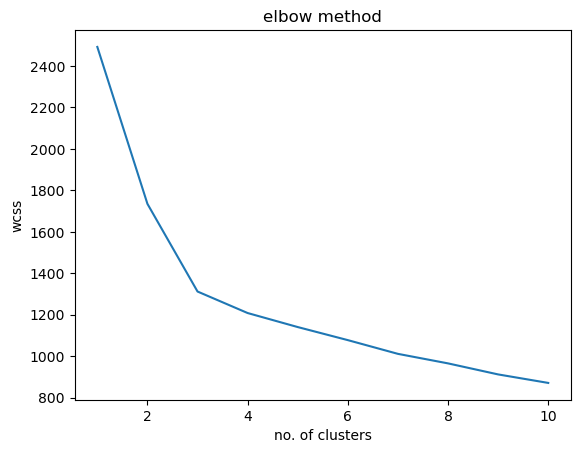

In [139]:
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [146]:
Kclusters= KMeans(3, random_state=40)
Kclusters.fit(df_norm)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [149]:
k_label= Kclusters.labels_
k_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [153]:
wine['Kclusters']= k_label
Kclusters.cluster_centers_

array([[ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841, -0.39632062,  1.35137067],
       [ 0.82157017, -0.33042473,  0.24887871, -0.67865104,  0.6444926 ,
         0.82730976,  0.89888505, -0.59689129,  0.62111023,  0.13533493,
         0.49797586,  0.74621417,  1.12027076, -0.92783613],
       [-0.93253323, -0.37705499, -0.40735094,  0.23389268, -0.56516581,
        -0.04023833,  0.07270993,  0.02968922, -0.01640023, -0.86531194,
         0.43277968,  0.2685912 , -0.78093888, -0.14022857]])

In [154]:
wine.groupby('Kclusters').agg(['mean']).reset_index()

,Kclusters,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,hc1_cluster,hc2_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.960000,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,2.000000,0.000000,1.000000
1,1,1.063492,13.665714,1.968254,2.434603,17.234921,108.920635,2.811429,2.924603,0.287778,1.945397,5.370952,1.070952,3.140000,1098.682540,0.142857,1.428571,1.904762
2,2,2.000000,12.245692,1.916308,2.255077,20.273846,91.692308,2.270000,2.101692,0.365538,1.581538,3.057692,1.056092,2.801846,501.661538,0.784615,2.138462,0.138462


In [159]:
for i in range(3):
    print('clusters:',i)
    print('total no.:', len(list(wine[wine['Kclusters']==i]['Type'].values)))
    print()

clusters: 0
total no.: 50

clusters: 1
total no.: 63

clusters: 2
total no.: 65



In [165]:
from sklearn import metrics
sh_complete= metrics.silhouette_score(df_norm, y_hc1)
print('silhouette score of complete:', sh_complete)
sh_ward= metrics.silhouette_score(df_norm, y_hc2)
print('silhouette score of ward:', sh_ward)
sh_kmeans= metrics.silhouette_score(df_norm, k_label)
print('silhouette score of kmeans:', sh_kmeans)

#(checking the silhouette score to find the best cluster form)
'''silhouette score is used to check the best cluster, score ranges from -1 to 1
   the heighest value indicates the best matched cluster'''

silhouette score of complete: 0.23174639738416794
silhouette score of ward: 0.29548622744389547
silhouette score of kmeans: 0.2997808087218177


In [199]:
#PERFORMING PCA

pca= PCA(n_components=13)
pca_values= pca.fit_transform(df_norm)
pca_values

array([[-3.44448359, -1.57230065, -0.12837584, ..., -0.5916573 ,
        -0.39906424,  0.51868943],
       [-2.51884874,  0.30733154, -1.99813967, ..., -0.22363754,
        -0.37508224,  0.36656332],
       [-2.6868806 , -1.12909337,  0.98726697, ..., -0.26351896,
         0.27830505,  0.01886606],
       ...,
       [ 3.06793444, -2.65373993, -1.02504979, ...,  0.51847252,
        -0.13478732,  0.69278799],
       [ 2.78430941, -2.21719396, -0.62192062, ...,  0.20034895,
        -0.42210068,  0.31645695],
       [ 3.59694734, -2.65490345,  0.86627311, ..., -0.14339582,
         0.40461463, -0.16793693]])

In [200]:
var= pca.explained_variance_ratio_
var

#(it shows how much proportion of variance of the dataset lies along the axis of pronciple component)
'''the values will be in the decending order, so the first is the most significant PC and the 2nd is the 2nd most 
   significant value and so on'''

array([0.38783141, 0.1800867 , 0.10511352, 0.06651656, 0.06110651,
       0.0466076 , 0.04053693, 0.02492234, 0.02071142, 0.01838228,
       0.01620735, 0.01338671, 0.01204958])

In [201]:
cum= np.cumsum(np.round(var, decimals=4)*100)
cum

array([38.78, 56.79, 67.3 , 73.95, 80.06, 84.72, 88.77, 91.26, 93.33,
       95.17, 96.79, 98.13, 99.33])

In [202]:
pca.components_

array([[-0.12245124,  0.23530378,  0.02240435,  0.23561532, -0.12178286,
        -0.35718432, -0.38941882,  0.27342572, -0.28154889,  0.10247801,
        -0.28753843, -0.35124135, -0.26015786,  0.37589691],
       [-0.48649505, -0.20644191, -0.32266857,  0.01617051, -0.30832657,
        -0.09804794, -0.03021509, -0.00495245, -0.06762424, -0.52044228,
         0.25732904,  0.13305552, -0.37839732, -0.09039862],
       [-0.21480692,  0.06495008,  0.6021487 ,  0.59469493,  0.12291889,
         0.17699098,  0.18013106,  0.13067194,  0.18099066, -0.15040972,
         0.10117443,  0.1966947 , -0.12787931,  0.12953088],
       [-0.03191441,  0.48211293, -0.25595103,  0.03457816, -0.31163858,
         0.20596764,  0.15830011, -0.27193414,  0.41921099,  0.07079058,
        -0.42140105,  0.18395556, -0.23372108,  0.12041776],
       [-0.26225862, -0.03151824, -0.13834651,  0.05134763,  0.74418424,
        -0.15476049, -0.11377112, -0.4974607 ,  0.11270697, -0.07413562,
        -0.13455403, -0.11

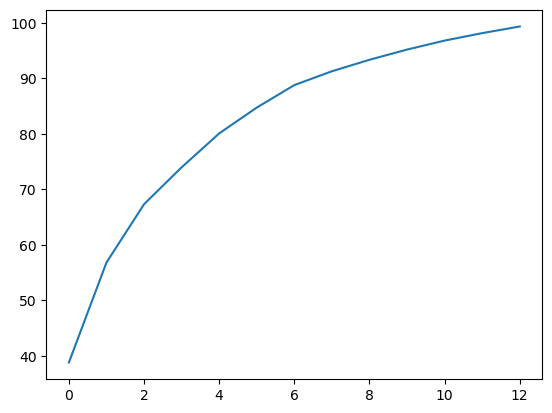

In [203]:
plt.plot(cum)

In [204]:
wine_pca= pca_values[:,0:3]
wine_pca

array([[-3.44448359e+00, -1.57230065e+00, -1.28375836e-01],
       [-2.51884874e+00,  3.07331544e-01, -1.99813967e+00],
       [-2.68688060e+00, -1.12909337e+00,  9.87266974e-01],
       [-3.79536376e+00, -2.91583843e+00, -1.25459984e-01],
       [-8.27596019e-01, -9.77998182e-01,  2.04479619e+00],
       [-3.18728550e+00, -2.21628662e+00, -6.41530128e-01],
       [-2.66891085e+00, -1.22579940e+00, -9.93176850e-01],
       [-2.28291679e+00, -1.63989021e+00,  4.86999279e-02],
       [-2.74432643e+00, -9.65563500e-01, -1.75356199e+00],
       [-2.94672043e+00, -8.76257328e-01, -9.28357224e-01],
       [-3.60321660e+00, -1.44088982e+00, -3.63666896e-01],
       [-2.05086569e+00, -6.10721024e-01, -1.24387951e+00],
       [-2.37126347e+00, -7.08150486e-01, -8.88843136e-01],
       [-3.61116850e+00, -1.25115311e+00, -1.14849781e+00],
       [-4.36210431e+00, -2.27712480e+00, -1.15973746e+00],
       [-2.04037834e+00, -1.82635450e+00,  3.00915634e-01],
       [-1.87882352e+00, -2.48982548e+00

Text(0.5, 1.0, 'Dendrogram')

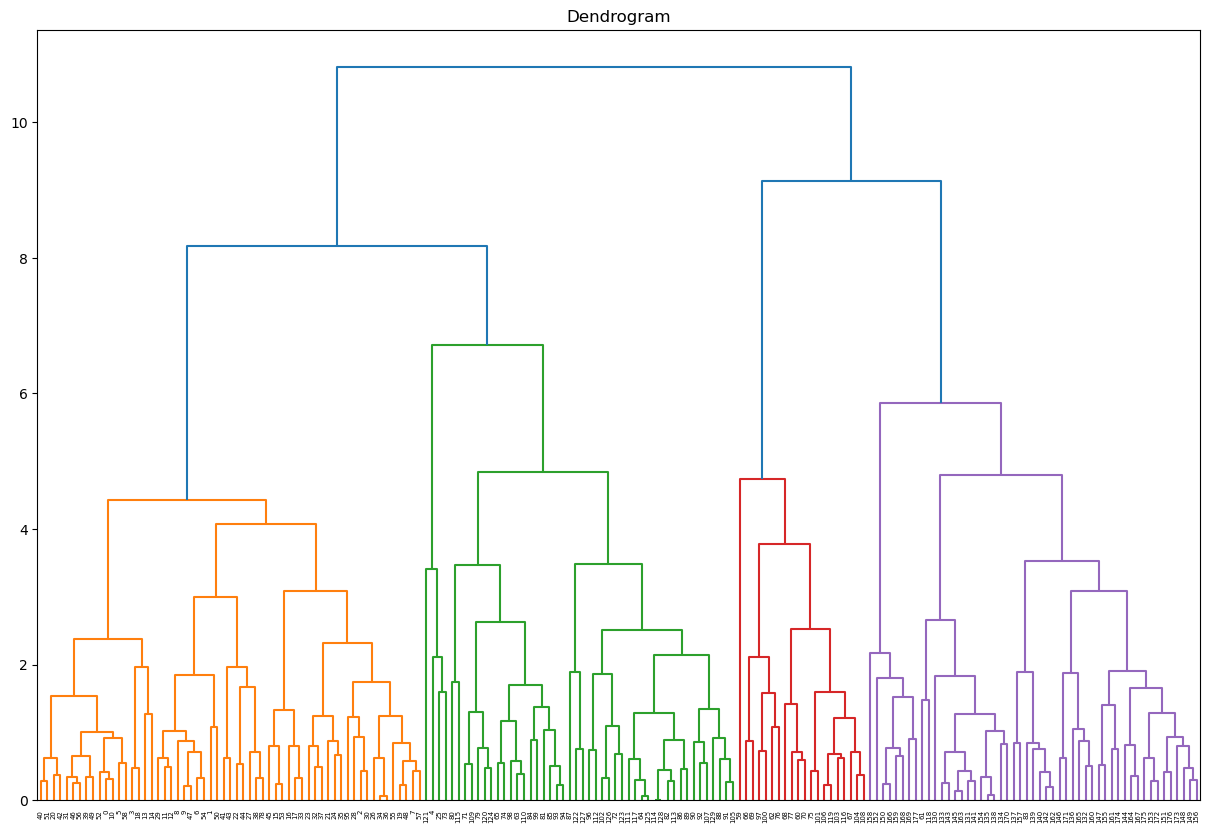

In [206]:
plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(wine_pca,method='complete'))
plt.title('Dendrogram')

In [209]:
p_hc1= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
p_hc1

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [211]:
yp_hc1= p_hc1.fit_predict(wine_pca)
clusters= pd.DataFrame(yp_hc1, columns=['phc1_cluster'])
clusters

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,phc1_cluster
0,3
1,3
2,3
3,3
4,4
...,...
173,0
174,0
175,0
176,0


In [212]:
wine['phc1_clusters']= yp_hc1

In [214]:
wine.groupby('phc1_clusters').agg(['mean']).reset_index()

,phc1_clusters,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,hc1_cluster,hc2_cluster,Kclusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.960784,0.058824,0.980392,0.039216
1,1,2.000000,12.185682,2.074091,2.368864,21.275000,91.090909,2.347727,2.212500,0.366136,1.715000,2.903409,1.054545,2.870227,482.795455,0.931818,1.954545,0.113636,2.000000
2,2,2.000000,12.390500,1.554000,1.942500,17.660000,94.200000,2.045000,1.702500,0.339500,1.367500,3.105000,1.080800,2.681000,558.400000,0.450000,2.350000,0.100000,1.950000
3,3,1.033898,13.719492,1.974576,2.422712,16.830508,107.288136,2.822712,2.961186,0.286780,1.938305,5.496102,1.062881,3.137627,1117.779661,0.101695,1.305085,1.932203,1.000000
4,4,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000,1.000000,4.000000,2.000000,1.250000


In [218]:
for i in range(5):
    print('cluster:', i)
    print('total no.:', len(list(wine[wine['phc1_clusters']==i]['Type'].values)))
    print()

cluster: 0
total no.: 51

cluster: 1
total no.: 44

cluster: 2
total no.: 20

cluster: 3
total no.: 59

cluster: 4
total no.: 4



Text(0.5, 1.0, 'dendrogram')

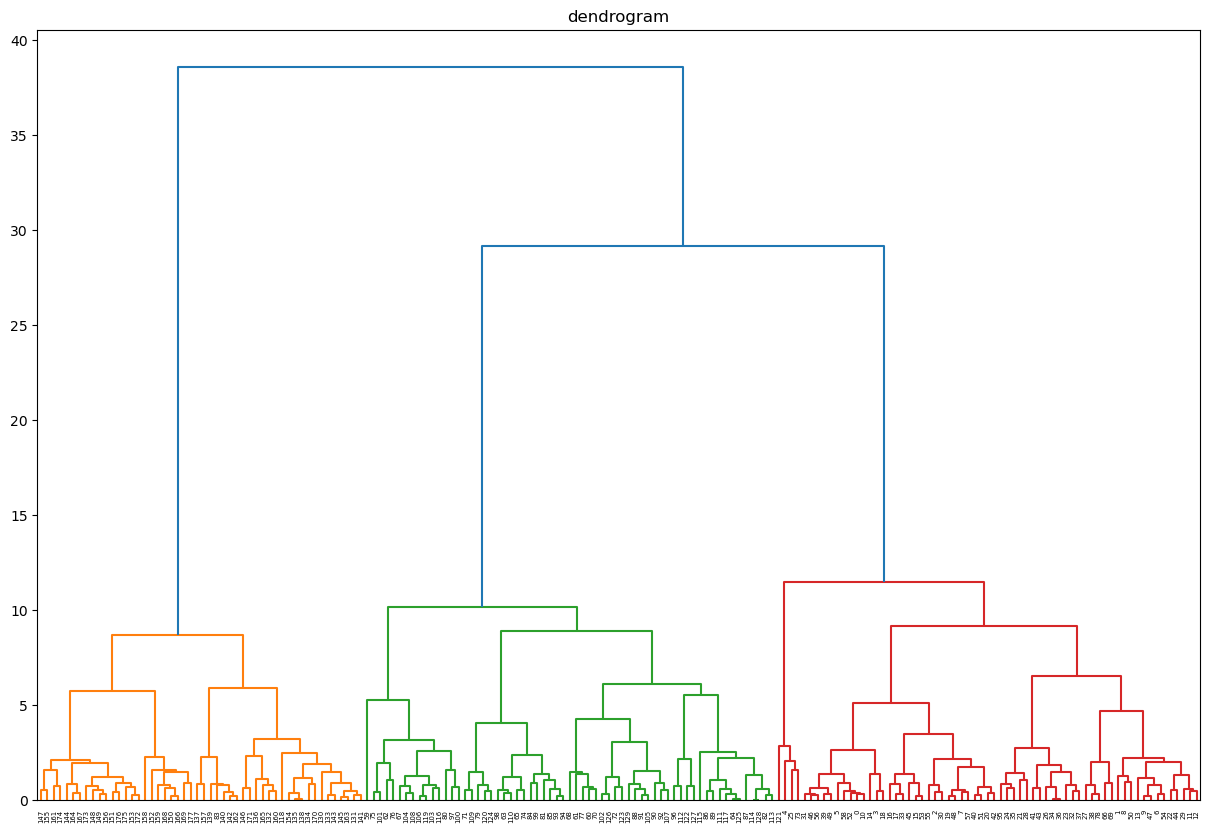

In [220]:
plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(wine_pca, method='ward'))
plt.title('dendrogram')

In [224]:
p_hc2= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
p_hc2

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [225]:
yp_hc2= p_hc2.fit_predict(wine_pca)
cluster= pd.DataFrame(yp_hc2, columns=['yhc2_cluster'])
cluster

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,yhc2_cluster
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [226]:
wine['yphc2_cluster']= yp_hc2

In [227]:
wine.groupby('yphc2_cluster').agg(['mean']).reset_index()

,yphc2_cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,hc1_cluster,hc2_cluster,Kclusters,phc1_clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.092308,13.624769,1.954769,2.435538,17.373846,108.60000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846,0.153846,1.461538,1.907692,1.030769,3.030769
1,1,2.960000,13.144000,3.346200,2.425600,21.330000,98.64000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,2.000000,0.000000,1.000000,0.000000,0.000000
2,2,2.000000,12.242857,1.928571,2.248413,20.226984,91.47619,2.244286,2.037302,0.365556,1.565873,2.975397,1.057079,2.781746,502.238095,0.793651,2.126984,0.079365,2.000000,1.269841


In [229]:
for i in range(3):
    print('cluster:', i)
    print('total no.:', len(list(wine[wine['yphc2_cluster']==i]['Type'].values)))
    print()

cluster: 0
total no.: 65

cluster: 1
total no.: 50

cluster: 2
total no.: 63



In [231]:
pwcss=[]
for i in range(1,11):
    pkmeans= KMeans(n_clusters=i, random_state=0)
    pkmeans.fit(wine_pca)
    pwcss.append(pkmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'wcss')

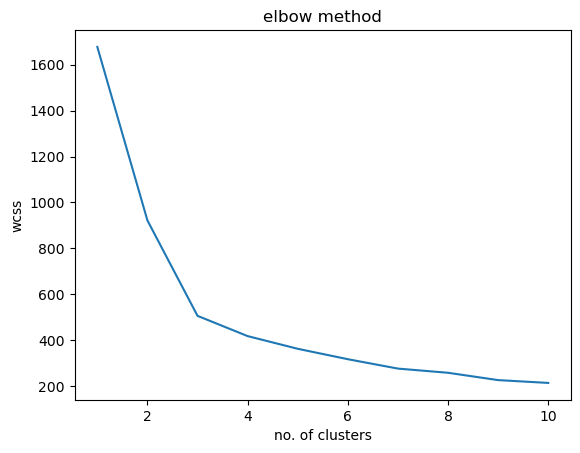

In [232]:
plt.plot(range(1,11), pwcss)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [233]:
pcluster= KMeans(3, random_state=40)
pcluster.fit(wine_pca)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [236]:
pk_label= pcluster.labels_
pk_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [237]:
wine['pk_cluster']=pk_label

In [240]:
pcluster.cluster_centers_

array([[ 3.08060621, -1.07482885, -0.26360633],
       [-2.42330176, -0.87542058, -0.14103283],
       [ 0.05530641,  1.75625048,  0.35472144]])

In [242]:
wine.groupby('pk_cluster').agg(['mean']).reset_index()

,pk_cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,...,Color,Hue,Dilution,Proline,cluster,hc1_cluster,hc2_cluster,Kclusters,phc1_clusters,yphc2_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.960000,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,...,7.264400,0.686200,1.698800,622.440000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,1,1.092308,13.637231,1.939692,2.418154,17.220000,108.123077,2.824923,2.941231,0.286615,...,5.356462,1.071231,3.134923,1082.753846,0.153846,1.430769,1.876923,1.030769,2.984615,0.030769
2,2,2.000000,12.230000,1.944127,2.266349,20.385714,91.968254,2.238889,2.058413,0.369206,...,2.999206,1.055333,2.796349,499.142857,0.793651,2.158730,0.111111,2.000000,1.317460,1.968254


In [244]:
for i in range(3):
    print('cluster:', i)
    print('total no.:', len(list(wine[wine['pk_cluster']==i]['Type'].values)))
    print()

cluster: 0
total no.: 50

cluster: 1
total no.: 65

cluster: 2
total no.: 63



In [246]:
psh_complete= metrics.silhouette_score(wine_pca, yp_hc1)
print('PCA silhouette score of complete:', psh_complete)
psh_ward= metrics.silhouette_score(wine_pca, yp_hc2)
print('PCA silhouette score of ward:', psh_ward)
psh_kmeans= metrics.silhouette_score(wine_pca, pk_label)
print('PCA silhouette score of kmeans:', psh_kmeans)

#(silhouette score after PCA)

PCA silhouette score of complete: 0.42118843007454493
PCA silhouette score of ward: 0.4800745184298919
PCA silhouette score of kmeans: 0.4815416255722662


In [253]:
print('sh_score of complete:', sh_complete,'\n''psh_score of complete:', psh_complete,'\n')
print('sh_score of ward:', sh_ward,'\n''psh_score of ward:', psh_ward,'\n')
print('sh_score of kmeans:', sh_kmeans,'\n''psh_score of kmeans:', psh_kmeans, '\n')

#(here we can see the results of silhouette befor and the after PCA)

sh_score of complete: 0.23174639738416794 
psh_score of complete: 0.42118843007454493 

sh_score of ward: 0.29548622744389547 
psh_score of ward: 0.4800745184298919 

sh_score of kmeans: 0.2997808087218177 
psh_score of kmeans: 0.4815416255722662 

